In [7]:
import numpy as np
from collections import Counter
from random import randint
import subprocess
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format='retina'

In [2]:
# Extract flt3 kmers
with open('data/flt3.fasta') as f:
    seq = ''
    for line in f.readlines():
        if line[0] != '>':
            seq += line.replace('\n', '')

In [3]:
len(seq)

3826

In [4]:
k = 31
kmer_count = Counter()
for i in range(len(seq)-30):
    kmer_count[seq[i:i+k]] += 1

In [5]:
# Number of unique kmers in flt3 for k=31
len(list(kmer_count.keys()))

3796

In [6]:
# Prep work
with open("data/patient_list.txt") as f:
    patient_list = f.read().split()

kmers = list(kmer_count.keys())

### Distibution Plotting

In [60]:
# Plot distributions in patients with & without mutation

with open('data/flt3_label.py', 'rb') as f:
    flt3 = pickle.load(f)

# Separating patients
positive = []
negative = []
for i in range(len(patient_list)):
    if flt3[i] == 0:
        negative.append(patient_list[i])
    elif flt3[i] == 1:
        positive.append(patient_list[i])
    
# Random patients for plots
def get_n_patients_from(n, lst):
    return [lst[randint(0, len(lst)-1)] for i in range(n)]
rand_patients = get_n_patients_from(3, positive) + get_n_patients_from(3, negative)

In [61]:
%%time
results = []
for p in rand_patients:
    output = ""
    jf = f"/u/leucegene/data/sample/{p}/transcriptome/jellyfish/2.2.3/kmers.k31.CL2.jf"
    for i in range(97):
        if i == 96:
            current = kmers[i*1000:]
        else:
            current = kmers[i*1000:(i+1)*1000]
        cmd = f"jellyfish query {jf} {' '.join(current)}"
        output += subprocess.getoutput(cmd) + "\n"
    results.append(output)
    print(f"Queried patient {p}!")

Queried patient 04H140!
Queried patient 10H095!
Queried patient 01H002!
Queried patient 03H022!
Queried patient 09H119!
Queried patient 05H054!
CPU times: user 379 ms, sys: 6.81 s, total: 7.19 s
Wall time: 1min 4s


In [62]:
# Format results
flt3_kmers = np.zeros((6, len(kmers)), dtype=int)
p = 0
for giant_string in results:
    temp = giant_string.replace(' ', '\n').split('\n')
    values = []
    for i in range(len(temp)):
        if i % 2 == 1 and temp[i] != '':
            values.append(temp[i])
    flt3_kmers[p] = values
    p += 1

In [63]:
flt3_kmers.shape

(6, 3796)

In [64]:
# See how many kmers actually differ between these 6 patients
sum(np.any((np.tile(flt3_kmers.mean(axis=0), (6,1)) != flt3_kmers), axis=0))

3769

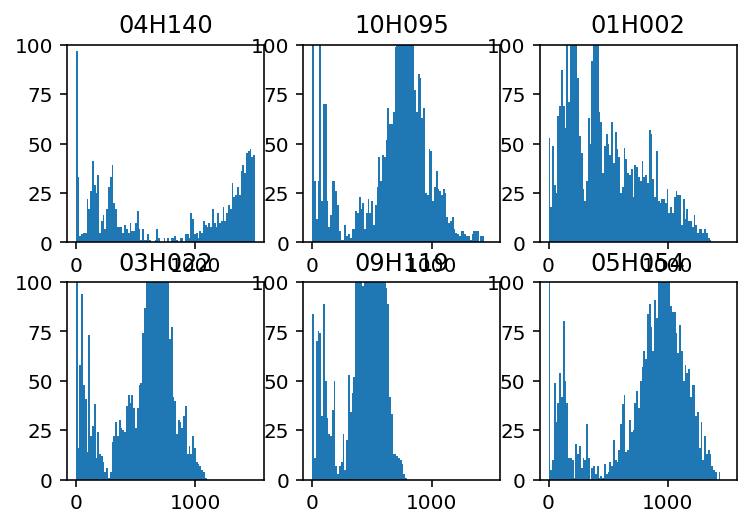

In [65]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(6):
    axes[i].hist(flt3_kmers[i], bins=100, histtype='stepfilled', range=(0, 1500), edgecolor='none')
    #axes[i].set_xscale('log')
    #axes[i].set_yscale('log')
    axes[i].set_title(rand_patients[i])
    axes[i].set_ylim(0, 100)
plt.show()
# top 3 are positive, bottom 3 are negative

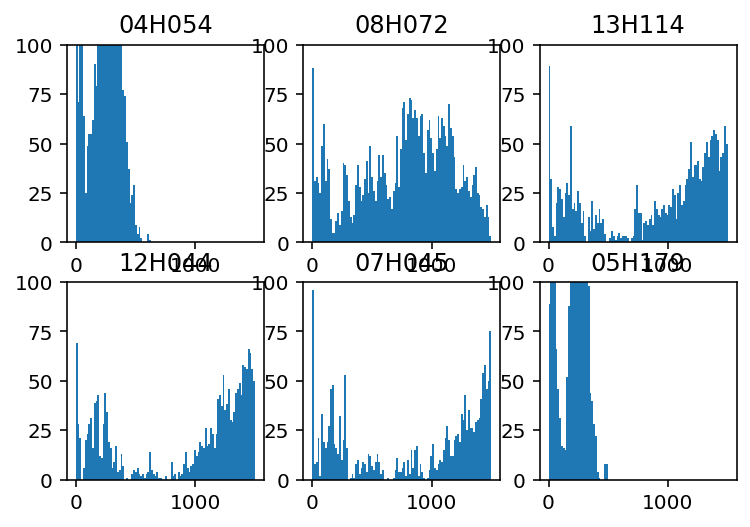

In [59]:
# Attempt 2

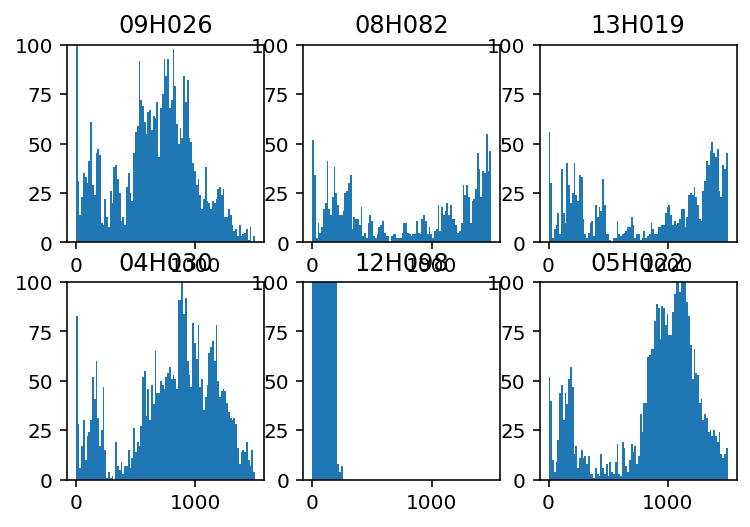

In [52]:
# Attempt 3

In [8]:
# Exporting flt3 kmers
with open('data/flt3_kmers', 'wb') as f:
    pickle.dump(kmers, f)